- python3.12
- torch '2.3.0+cu121'
- numpy '1.26.4'
- matlotlib '3.8'
- idx2numpy '1.2.3'

In [1]:
import torch
import numpy as np

*"Everything in PyTorch is based on Tensor operations. A Tensor is a multi-dimensional matrix containing elements of a single data type"*


In [2]:
# matrix from numpy.ndarray
x = np.random.randint(1, 100, size=(10, 10))
x

array([[94, 89, 29, 13, 11,  7, 79, 32, 79, 34],
       [11,  5, 83, 14, 17, 51,  9, 38, 88, 80],
       [ 5, 54, 42,  3,  9, 60, 69, 59, 33,  5],
       [ 3, 37, 33, 63, 38, 57, 74,  1, 26, 14],
       [81, 78, 46, 74, 82,  9,  9, 43, 87, 89],
       [49, 62, 20, 24, 38,  5, 62,  4, 48, 89],
       [72, 28, 24, 93, 91, 44, 93, 24, 98, 67],
       [54, 18, 81, 76, 91, 45, 16, 63, 53,  4],
       [42, 93, 34, 59, 13, 66, 63,  5, 73, 79],
       [ 8, 49, 38, 41, 90, 76, 25, 42, 14, 46]])

In [3]:
# casting to tensor
x = torch.from_numpy(x)  # Basically, the data type follows from the origin
x

tensor([[94, 89, 29, 13, 11,  7, 79, 32, 79, 34],
        [11,  5, 83, 14, 17, 51,  9, 38, 88, 80],
        [ 5, 54, 42,  3,  9, 60, 69, 59, 33,  5],
        [ 3, 37, 33, 63, 38, 57, 74,  1, 26, 14],
        [81, 78, 46, 74, 82,  9,  9, 43, 87, 89],
        [49, 62, 20, 24, 38,  5, 62,  4, 48, 89],
        [72, 28, 24, 93, 91, 44, 93, 24, 98, 67],
        [54, 18, 81, 76, 91, 45, 16, 63, 53,  4],
        [42, 93, 34, 59, 13, 66, 63,  5, 73, 79],
        [ 8, 49, 38, 41, 90, 76, 25, 42, 14, 46]])

In [4]:
# create tensor
x = torch.LongTensor([1, 2, 3, 4, 5])  # or torch.tensor([1,2,3,4,5],dtype=torch.int32)
x

tensor([1, 2, 3, 4, 5])

## Operation with Tensors
* operasi tensor di pytorch hampir sama dengan yang di numpy "*Tensor computation (like NumPy)*"
* jadi skip aja ye ....


In [5]:
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32, requires_grad=False)
y = torch.rand(2, 2, requires_grad=False)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[0.0624, 0.9009],
        [0.7961, 0.9066]])


### Add,Subtract,Divide (elementwise)

In [6]:
# addition
print(x + y)

# subtraction
print(x - y)

# division
print(x / y)


# in place addition, everythin with a trailing underscore is an inplace operation
# i.e. it will modify the variable
# y.add_(x), y.subtract_(x)

tensor([[1.0624, 2.9009],
        [3.7961, 4.9066]])
tensor([[0.9376, 1.0991],
        [2.2039, 3.0934]])
tensor([[16.0293,  2.2201],
        [ 3.7685,  4.4119]])


### Multiply

In [7]:
# hadamart product (elementwise)
print(x * y)  # or x.multiply(y)

# matrix product
print(x @ y)  # or x.matmul(y)

# dot product
x.reshape(-1).dot(y.reshape(-1))

tensor([[0.0624, 1.8017],
        [2.3882, 3.6265]])
tensor([[1.6546, 2.7141],
        [3.3715, 6.3291]])


tensor(7.8789)

### Slicing

In [8]:
print(x)
print("x[:, 0]", x[:, 0])  # all rows, column 0
print("x[1, :]", x[1, :])  # row 1, all columns
print("x[1, 1]", x[1, 1])  # element at 1, 1

# Get the actual value if only 1 element in your tensor
print("x[1,1].item()", x[1, 1].item())

tensor([[1., 2.],
        [3., 4.]])
x[:, 0] tensor([1., 3.])
x[1, :] tensor([3., 4.])
x[1, 1] tensor(4.)
x[1,1].item() 4.0


In [9]:
# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
# if -1 it pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## Functional Pytorch

![img_simple_neural_network](https://miro.medium.com/v2/resize:fit:1400/1*FlJ_ZPMSlpCdeuAYzC0gPw.png)

In [10]:
from torch.functional import F

In [11]:
"""
x -> (batch_size,input_features)
w -> (output_features,input_features)
b -> (output_features)
"""

x = torch.FloatTensor([[1, 2], [3, 4]])  # (2,2)
w = torch.tensor([[0.5, 0.2]])  # (1,2)
b = torch.tensor([0.1])  # (1,)

### Linear

In [12]:
out = F.linear(input=x, weight=w, bias=b)
out

tensor([[1.0000],
        [2.4000]])

In [13]:
# Manual Calculation
x @ w.T + b

tensor([[1.0000],
        [2.4000]])

### Activation Function

##### ReLU

In [14]:
F.relu(out)

tensor([[1.0000],
        [2.4000]])

In [15]:
# Manual Calculation
torch.max(torch.zeros_like(out), out)

tensor([[1.0000],
        [2.4000]])

#### Sigmoid (Logistic)

In [16]:
F.sigmoid(out)

tensor([[0.7311],
        [0.9168]])

In [17]:
# Manual Calculation
1 / (1 + torch.exp(-out))

tensor([[0.7311],
        [0.9168]])

In [18]:
# logsigmoid
F.logsigmoid(out)

tensor([[-0.3133],
        [-0.0868]])

#### Tanh (Hyperbolic tangent)


In [19]:
F.tanh(out)

tensor([[0.7616],
        [0.9837]])

#### Softmax

In [20]:
F.softmax(out, dim=0)

tensor([[0.1978],
        [0.8022]])

In [21]:
# Manual Calculation
torch.exp(out) / torch.sum(torch.exp(out), dim=0, keepdim=True)

tensor([[0.1978],
        [0.8022]])

In [22]:
# logsoftmax
F.log_softmax(out, dim=0)

tensor([[-1.6204],
        [-0.2204]])

## MNIST 
*Hello world in NN*

In [23]:
import idx2numpy
import zipfile
import os

MNIST_path = "dataset/MNIST"
IMG_NAMEFILE = "t10k-images.idx3-ubyte"
LABEL_NAMEFILE = "t10k-labels.idx1-ubyte"
MNIST = os.path.join(MNIST_path, "t10k-images.idx3-ubyte.zip")
with zipfile.ZipFile(MNIST, "r") as f:
    with f.open(IMG_NAMEFILE) as file:
        X = idx2numpy.convert_from_file(file)
        y = idx2numpy.convert_from_file(os.path.join(MNIST_path, LABEL_NAMEFILE))

### Preview

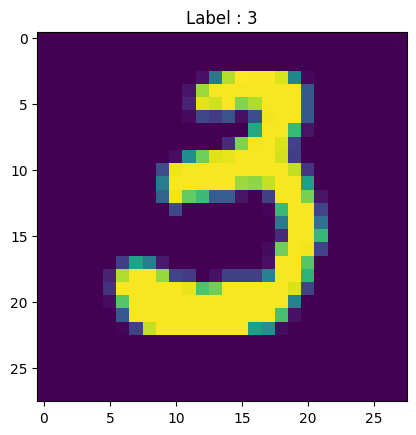

In [24]:
import matplotlib.pyplot as plt

idx = np.random.choice([i for i in range(len(X))])
plt.title(f"Label : {y[idx]}")
plt.imshow(X[idx]);

### Create Dataset

In [25]:
from torch.utils.data import TensorDataset, DataLoader

X = np.copy(X)
y = np.copy(y)
X_tensor = torch.FloatTensor(X)
y_tensor = torch.LongTensor(y)

dataset = TensorDataset(X_tensor, y_tensor)

train_dataset, val_dataset = torch.utils.data.random_split(
    dataset, lengths=[8000, 2000]
)  # lengths parameter is train data length and val data length

#### Preview Dataset

In [26]:
print(train_dataset[0])

(tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.

### Create DataLoaders for Mini-batch gradient descent

In [27]:
BATCH_SIZE = 64

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=2)

dataloaders = {"train": train_loader, "val": val_loader}

## Simple NN

In [28]:
class NN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NN, self).__init__()
        self.l1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.l2 = torch.nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x


INPUT_SIZE = 28 * 28  # size image
HIDDEN_SIZE = 500
NUM_CLASSES = 10
LEARNING_RATE = 0.001

### Use Cuda if cuda is available

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NN(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_classes=NUM_CLASSES).to(
    device
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters())

model

NN(
  (l1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=500, out_features=10, bias=True)
)

### Training

In [30]:
EPOCHS = 10
train_acc, train_loss = [], []
val_acc, val_loss = [], []

for epoch in range(EPOCHS):
    for phase in dataloaders:
        if phase == "train":
            model.train()
        else:
            model.eval()

        cost = 0
        acc = 0

        for inputs, targets in dataloaders[phase]:
            optimizer.zero_grad()

            inputs, targets = inputs.reshape(-1, 28 * 28).to(device), targets.to(device)
            outputs = model.forward(inputs)
            loss = criterion(outputs, targets)
            pred = outputs.argmax(1)

            if phase == "train":
                loss.backward()
                optimizer.step()

            cost += loss.item() * inputs.shape[0]
            acc += torch.sum(pred == targets.data)

        if phase == "train":
            train_acc.append(acc / len(train_dataset))
            train_loss.append(cost / len(train_dataset))
        else:
            val_acc.append(acc / len(val_dataset))
            val_loss.append(cost / len(val_dataset))

    print(
        f"\rEpoch : {epoch+1:4}/{EPOCHS:4} | train_loss : {train_loss[-1]:.4f}| val_loss : {val_loss[-1]:.4f} | train_acc : {train_acc[-1]:.4f} | val_acc : {val_acc[-1]:.4f}",
        end=" ",
    )

Epoch :   10/  10 | train_loss : 0.1135| val_loss : 0.4994 | train_acc : 0.9761 | val_acc : 0.9365 

## Test Model

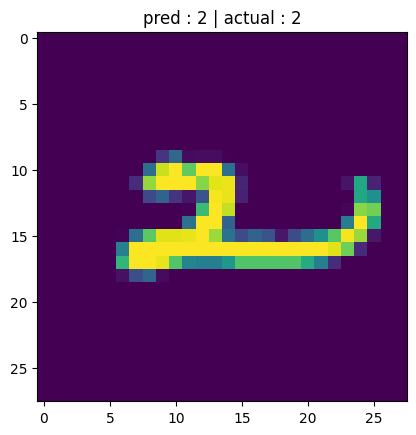

In [31]:
def pred(X: torch.Tensor, actual=None):
    y = model(X.reshape(-1, 28 * 28).to(device)).argmax(1)
    plt.title(f"pred : {y.item()} | actual : {actual}")
    plt.imshow(X)


idx = np.random.choice(len(val_dataset))
X_test, y_test = val_dataset[idx][0], val_dataset[idx][1]
pred(X_test, y_test)